참고 tutorial : https://nbviewer.jupyter.org/gist/subinium/26d22a786b0b7d088da63a97bf8e1d44    <br>
DATA : https://www.kaggle.com/szrlee/stock-time-series-20050101-to-20171231#GOOGL_2006-01-01_to_2018-01-01.csv

## What I learned
* parse_dates : 날짜컬럼을 datetime 형태로 만들어줌

* fillna() 메서드의 ffill 매개변수, bfill매개변수 
    * ffill 매개변수 : 결측값을 앞 방향으로 채워나감
    * bfill 매개변수 : 결측값을 뒷 방향으로 채워나감
    
* asfreq 메서드 : 시계열을 특정 frequency로 변환 (30S = 30초, M = 매월) 

* plt.savefig : png파일로 이미지 저장

* 시계열 데이터 전처리 방식 :
    * Percent Change -> 시계열에서 각 데이터가 이전에 비해 변한 정도를 나타내는값 
        * shift()를 이용해 dataframe에서 최소 단위로 shift를 진행하고, div 메서드로 앞의 값을 나눠주는 방식
        
* 컬럼별로 subplot 그릴때
    * data.plot(subplots=True, figsize=(10,10))
    
* rcParams 설정을 활용하면, 차트의 크기와 선의 색, 두께등의 기본 값을 설정할 수 있다.
    * plt.rcParams["figure.figsize"] = (14,4)
    
* VAR models : 
    * 벡터 시계열에 대한 AR 모형

In [215]:
import plotly
plotly.__version__

'4.0.0'

In [214]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') 

# Above is a special style template for matplotlib, highly useful for visualizing time series data
%matplotlib inline
from pylab import rcParams
from plotly import tools
#import plotly.plotly as py
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
import statsmodels.api as sm

from numpy.random import normal, seed

from scipy.stats import norm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA

import math
from sklearn.metrics import mean_squared_error
# plotly.__version__
print(os.listdir("./"))

['monthly data.csv', 'daily data.csv', 'MCD_2006-01-01_to_2018-01-01.csv', 'monthly data_filter.csv', 'ARIMA_monthly data.ipynb', 'weekly data.csv', 'stocks.png', '.ipynb_checkpoints', 'ARIMA_related theory.ipynb', 'weekly data_filter.csv', 'TimeSeries_ref.ipynb', 'pressure.csv', 'GOOGL_2006-01-01_to_2018-01-01.csv', 'humidity.csv', 'ARIMA_weekly data.ipynb']


* 1. Introduction to date and time
    * 1.1 Importing time series data
    * 1.2 Cleaning and preparing time series data
    * 1.3 Visualizing the datasets
    * 1.4 Timestamps and Periods
    * 1.5 Using date_range
    * 1.6 Using to_datetime
    * 1.7 Shifting and lags
    * 1.8 Resampling
* 2. Finance and Statistics
    * 2.1 Percent change
    * 2.2 Stock returns
    * 2.3 Absolute change in successive rows
    * 2.4 Comaring two or more time series
    * 2.5 Window functions
    * 2.6 OHLC charts
    * 2.7 Candlestick charts
    * 2.8 Autocorrelation and Partial Autocorrelation
* 3. Time series decomposition and Random Walks
    * 3.1 Trends, Seasonality and Noise
    * 3.2 White Noise
    * 3.3 Random Walk
    * 3.4 Stationarity
* 4. Modelling using statsmodels
    * 4.1 AR models
    * 4.2 MA models
    * 4.3 ARMA models
    * 4.4 ARIMA models
    * 4.5 VAR models
    * 4.6 State space methods
    * 4.6.1 SARIMA models
    * 4.6.2 Unobserved components
    * 4.6.3 Dynamic Factor models

# 1. Introduction to date and time
## 1.1 Importing time series data

### How to import data?
우선 이 커널에서 필요한 데이터셋을 불러와야합니다. pd.read_csv()에서 두 개의 매개변수를 사용해서 불러옵시다. <br>

parse_dates 매개변수를 사용하여 필요한 시계열을 datetime 열로 변환합니다. <br>
dataframe의 index는 index_col로 지정합니다.

#### Data being used:-
* Google Stocks Data (구글 주식 데이터)
* Humidity in different world cities (세계 여러 도시의 습도 데이터)
* Microsoft Stocks Data (마이크로소프트 주식 데이터)
* Pressure in different world cities (세계 여러 도시의 기압 데이터)

#### Data info
* Open - price of the stock at market open (this is NYSE data so all in USD)
* High - Highest price reached in the day
* Low Close - Lowest price reached in the day
* Volume - Number of shares traded
* Name - the stock's ticker name

In [17]:
google = pd.read_csv('./GOOGL_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=['Date'])
google.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,211.47,218.05,209.32,217.83,13137450,GOOGL
2006-01-04,222.17,224.70,220.09,222.84,15292353,GOOGL
2006-01-05,223.22,226.00,220.97,225.85,10815661,GOOGL
2006-01-06,228.66,235.49,226.85,233.06,17759521,GOOGL
2006-01-09,233.44,236.94,230.70,233.68,12795837,GOOGL


In [26]:
humidity = pd.read_csv('./humidity.csv', index_col='datetime', parse_dates=['datetime'])
humidity.tail()

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
2017-11-29 20:00:00,NaN,81.0,NaN,93.0,24.0,72.0,18.0,68.0,37.0,18.0,...,27.0,NaN,64.0,37.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-29 21:00:00,NaN,71.0,NaN,87.0,21.0,72.0,18.0,73.0,34.0,12.0,...,29.0,NaN,59.0,74.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-29 22:00:00,NaN,71.0,NaN,93.0,23.0,68.0,17.0,60.0,32.0,15.0,...,31.0,NaN,66.0,74.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-29 23:00:00,NaN,71.0,NaN,87.0,14.0,63.0,17.0,33.0,30.0,28.0,...,26.0,NaN,58.0,56.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-30 00:00:00,NaN,76.0,NaN,75.0,56.0,72.0,17.0,23.0,34.0,31.0,...,32.0,NaN,58.0,56.0,NaN,NaN,NaN,NaN,NaN,NaN


## 1.2 Cleaning and preparing time series data
구글 주식 데이터는 누락 데이터가 없지만, 습도 데이터는 누락데이터가 꽤 있습니다. <br>

누락 데이터는 fillna() 메서드와 ffill 매개변수를 이용해 채웁니다. fillna()의 매개변수는 다음과 같은 매개변수가 있습니다. 이는 후에도 언급하니 가볍게 넘어가면 될 것 같습니다.<br>

* ffill : 앞의 값을 관찰한 값으로 채워넣음
* bfill : 뒤의 값을 관찰한 값으로 채워넣음

In [27]:
humidity = humidity.iloc[1:]
humidity = humidity.fillna(method='ffill')
humidity.head()

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
2012-10-01 13:00:00,76.0,81.0,88.0,81.0,88.0,82.0,22.0,23.0,50.0,62.0,...,71.0,58.0,93.0,68.0,50.0,63.0,22.0,51.0,51.0,50.0
2012-10-01 14:00:00,76.0,80.0,87.0,80.0,88.0,81.0,21.0,23.0,49.0,62.0,...,70.0,57.0,91.0,68.0,51.0,62.0,22.0,51.0,51.0,50.0
2012-10-01 15:00:00,76.0,80.0,86.0,80.0,88.0,81.0,21.0,23.0,49.0,62.0,...,70.0,57.0,87.0,68.0,51.0,62.0,22.0,51.0,51.0,50.0
2012-10-01 16:00:00,77.0,80.0,85.0,79.0,88.0,81.0,21.0,23.0,49.0,62.0,...,69.0,57.0,84.0,68.0,52.0,62.0,22.0,51.0,51.0,50.0
2012-10-01 17:00:00,78.0,79.0,84.0,79.0,88.0,80.0,21.0,24.0,49.0,63.0,...,69.0,57.0,80.0,68.0,54.0,62.0,23.0,51.0,51.0,50.0


## 1.3 Visualizing the datasets
asfreq 메서드는 시계열을 특정 frequency로 변환합니다. (30S = 30초, M = 매월) upsampling 또는 downsampling에 사용할 수 있습니다. <br>

여기서는 매개변수를 'M'으로 전달하였고, 이는 매월 빈도를 의미합니다.

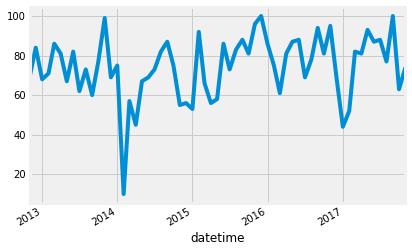

In [29]:
humidity['Kansas City'].asfreq('M').plot()

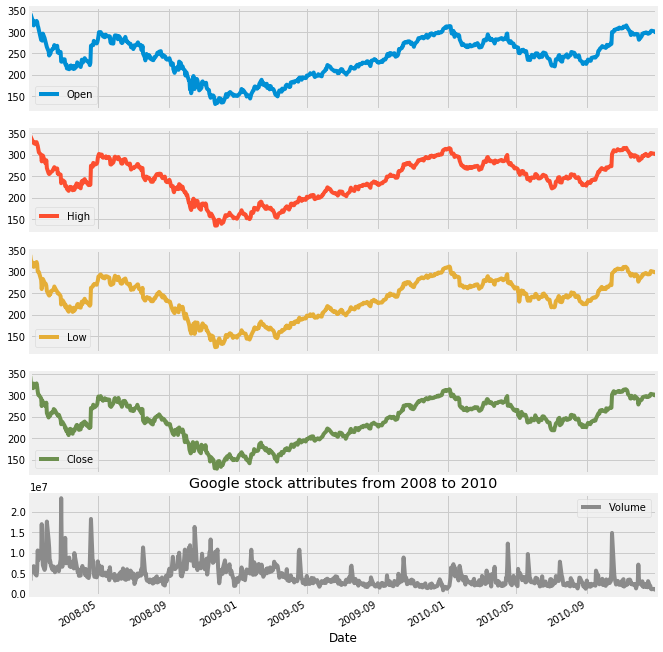

In [64]:
google['2008':'2010'].plot(subplots=True, figsize=(10,12))
plt.title('Google stock attributes from 2008 to 2010')
# png파일로 저장
plt.savefig('stocks.png')
plt.show()

## 1.4 Timestamps and Periods
timestamp와 period는 무엇이고, 어떻게 유용할까요?
* Timestamp는 특정 시점을 나타내기 위해 사용됩니다.
* Period는 특정 기간을 나타내기 위해 사용됩니다. <br>
Periods는 기간동안 특정 이벤트가 있는지 체크하는데 사용할 수 있습니다. 각각은 서로 변환가능합니다. 우선 아래 예시로 생성 방법을 살펴보겠습니다.

In [40]:
timestamp=pd.Timestamp(2017,1,1,12)
timestamp

Timestamp('2017-01-01 12:00:00')

In [46]:
period = pd.Period('2017-01-01')
period

Period('2017-01-01', 'D')

In [47]:
period.start_time < timestamp < period.end_time

True

In [48]:
# Converting timestamp to period
new_period = timestamp.to_period(freq='H')
new_period

Period('2017-01-01 12:00', 'H')

In [49]:
# Converting period to timestamp
news_timestamp = period.to_timestamp(freq='H', how='start')
news_timestamp

Timestamp('2017-01-01 00:00:00')

## 1.5 Using date_range
date_range는 무엇이고, 어떻게 유용할까요? <br>

date_range는 고정 frequency datetimeindex를 반환하는 메서드입니다. 이것도 예시를 봐야 이해가 빠를 것 같습니다.<br>
이는 기존 데이터에서 본인만의 시계열 요소를 만들거나 전체 데이터를 정리(arranging)하는데 사용할 수 있습니다.

In [50]:
# daily frequency
dr1 = pd.date_range(start='1/1/18', end='1/9/18')
dr1

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09'],
              dtype='datetime64[ns]', freq='D')

In [51]:
# monthly frequency
dr2 = pd.date_range(start='1/1/18', end='1/1/19', freq='M')
dr2

DatetimeIndex(['2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30',
               '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31',
               '2018-09-30', '2018-10-31', '2018-11-30', '2018-12-31'],
              dtype='datetime64[ns]', freq='M')

In [52]:
# 특정 시작날짜를 정하지 않고, 구간값을 주고 datetimeindex를 만듬
dr3 = pd.date_range(end='1/4/2014', periods=8)
dr3

DatetimeIndex(['2013-12-28', '2013-12-29', '2013-12-30', '2013-12-31',
               '2014-01-01', '2014-01-02', '2014-01-03', '2014-01-04'],
              dtype='datetime64[ns]', freq='D')

In [54]:
# 시작과 끝 날짜를 주고, 기간이주어졌을 때
dr4 = pd.date_range(start='2013-04-24', end='2014-11-17', periods=3)
dr4

DatetimeIndex(['2013-04-24', '2014-02-04', '2014-11-17'], dtype='datetime64[ns]', freq=None)

## 1.6 Using to_datetime
pandas.to_datetime()은 Dataframe을 datetime으로 변환하는 함수입니다.

In [55]:
df = pd.DataFrame({'year':[2015,2016], 'month':[2,3], 'day':[4,5]})
df

,year,month,day
0,2015,2,4
1,2016,3,5


In [56]:
df = pd.to_datetime(df)
df

0   2015-02-04
1   2016-03-05
dtype: datetime64[ns]

In [57]:
df=pd.to_datetime('01-01-2017')
df

Timestamp('2017-01-01 00:00:00')

## 1.7 Shifting and lags
우리는 원하는 기간을 shift하여 index를 원하는 frequency로 이동변환 가능합니다. <br>

이는 과거와 현재의 시계열을 비교하는데 유용합니다. <br>

아래는 데이터를 월 단위로 바꾼 후에 10개월을 shift한 후 시각화한 그래프입니다. <br>

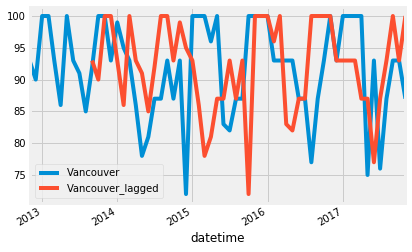

In [66]:
humidity['Vancouver'].asfreq('M').plot(legend=True)
shifted = humidity['Vancouver'].asfreq('M').shift(10).plot(legend=True)
shifted.legend(['Vancouver','Vancouver_lagged'])
plt.show()

## 1.8 Resampling
Upsampling : 시계열을 low frequency에서 high frequency로 변환(리샘플링)합니다. <br>
누락된 데이터를 채우거나 보간하는 방법을 포함합니다. (월 데이터 -> 일 데이터) <br>

Downsampling : 시계열을 high frequency에서 low frequency로 변환(리샘플링)합니다. <br>
기존 데이터를 집계하는 것을 포함합니다. (주간 데이터 -> 월 데이터)

In [75]:
pressure = pd.read_csv('./pressure.csv', index_col='datetime', parse_dates=['datetime'])
pressure.head()

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1011.0,NaN,NaN,NaN
2012-10-01 13:00:00,NaN,1024.0,1009.0,1027.0,1013.0,1013.0,1018.0,1013.0,1024.0,1028.0,...,1014.0,1012.0,1001.0,1014.0,984.0,1012.0,1010.0,1013.0,1013.0,990.0
2012-10-01 14:00:00,NaN,1024.0,1009.0,1027.0,1013.0,1013.0,1018.0,1013.0,1024.0,1028.0,...,1014.0,1012.0,986.0,1014.0,984.0,1012.0,1010.0,1013.0,1013.0,990.0
2012-10-01 15:00:00,NaN,1024.0,1009.0,1028.0,1013.0,1013.0,1018.0,1013.0,1024.0,1028.0,...,1014.0,1012.0,945.0,1014.0,984.0,1012.0,1010.0,1013.0,1013.0,990.0
2012-10-01 16:00:00,NaN,1024.0,1009.0,1028.0,1013.0,1013.0,1018.0,1013.0,1024.0,1028.0,...,1014.0,1012.0,904.0,1014.0,984.0,1012.0,1010.0,1013.0,1013.0,990.0


In [76]:
pressure = pressure.iloc[1:]
pressure = pressure.fillna(method='ffill')
pressure.tail()

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
2017-11-29 20:00:00,1021.0,1031.0,1013.0,1030.0,1016.0,1017.0,1021.0,1018.0,1025.0,1016.0,...,1021.0,1020.0,1021.0,1017.0,984.0,1011.0,968.0,1023.0,1023.0,1011.0
2017-11-29 21:00:00,1021.0,1030.0,1013.0,1030.0,1016.0,1017.0,1020.0,1018.0,1024.0,1018.0,...,1021.0,1020.0,1023.0,1019.0,984.0,1011.0,968.0,1023.0,1023.0,1011.0
2017-11-29 22:00:00,1021.0,1030.0,1013.0,1029.0,1015.0,1016.0,1020.0,1017.0,1024.0,1018.0,...,1022.0,1020.0,1024.0,1019.0,984.0,1011.0,968.0,1023.0,1023.0,1011.0
2017-11-29 23:00:00,1021.0,1029.0,1013.0,1028.0,1016.0,1016.0,1020.0,1016.0,1024.0,1020.0,...,1023.0,1020.0,1026.0,1022.0,984.0,1011.0,968.0,1023.0,1023.0,1011.0
2017-11-30 00:00:00,1021.0,1029.0,1013.0,1028.0,1015.0,1017.0,1019.0,1016.0,1024.0,1021.0,...,1024.0,1020.0,1027.0,1023.0,984.0,1011.0,968.0,1023.0,1023.0,1011.0


In [77]:
pressure = pressure.fillna(method='bfill')
pressure.head()

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
2012-10-01 13:00:00,807.0,1024.0,1009.0,1027.0,1013.0,1013.0,1018.0,1013.0,1024.0,1028.0,...,1014.0,1012.0,1001.0,1014.0,984.0,1012.0,1010.0,1013.0,1013.0,990.0
2012-10-01 14:00:00,807.0,1024.0,1009.0,1027.0,1013.0,1013.0,1018.0,1013.0,1024.0,1028.0,...,1014.0,1012.0,986.0,1014.0,984.0,1012.0,1010.0,1013.0,1013.0,990.0
2012-10-01 15:00:00,807.0,1024.0,1009.0,1028.0,1013.0,1013.0,1018.0,1013.0,1024.0,1028.0,...,1014.0,1012.0,945.0,1014.0,984.0,1012.0,1010.0,1013.0,1013.0,990.0
2012-10-01 16:00:00,807.0,1024.0,1009.0,1028.0,1013.0,1013.0,1018.0,1013.0,1024.0,1028.0,...,1014.0,1012.0,904.0,1014.0,984.0,1012.0,1010.0,1013.0,1013.0,990.0
2012-10-01 17:00:00,807.0,1024.0,1009.0,1029.0,1013.0,1013.0,1018.0,1013.0,1024.0,1028.0,...,1014.0,1012.0,863.0,1014.0,984.0,1012.0,1010.0,1013.0,1013.0,990.0


* ffill 파라미터를 사용하면 마지막 유효 관측치를 전파하여 데이터의 갭을 채웁니다.
* bfill 파라미터를 사용하면 다음 유효 관측치를 전파하여 데이터의 갭을 채웁니다.

In [78]:
# Shape before resampling(downsampling)
pressure.shape

(45252, 36)

기존 데이터는 1시간 단위로 존재했습니다. 이를 3일 단위로 다운샘플링해보겠습니다. resample 메서드를 사용했고, 평균을 사용했습니다.

In [79]:
pressure = pressure.resample('3D').mean()
pressure.head()

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
2012-10-01,931.627119,1022.644068,1010.881356,1031.271186,1011.627119,1011.966102,1016.322034,1012.084746,1022.542373,1024.118644,...,1014.152542,1013.423729,937.627119,1013.677966,985.050847,1012.949153,1011.796610,1013.000000,1013.000000,990.525424
2012-10-04,1019.083333,1023.041667,1014.694444,1028.305556,1015.555556,1016.277778,1013.194444,1014.097222,1019.972222,1020.666667,...,1018.097222,1017.680556,1017.180556,1019.805556,984.930556,1013.083333,1012.611111,1013.000000,1013.000000,990.083333
2012-10-07,1013.930556,1017.444444,1016.597222,1018.736111,1013.416667,1014.222222,1012.888889,1011.861111,1005.833333,1020.458333,...,1017.958333,1016.750000,1014.152778,1016.305556,982.972222,1013.027778,1007.555556,1013.000000,1013.000000,989.833333
2012-10-10,1015.000000,1015.430556,1014.833333,1018.416667,1010.694444,1014.013889,1000.166667,1005.611111,986.000000,984.486111,...,1018.694444,1017.916667,1016.166667,1017.319444,979.763889,1006.527778,998.763889,1012.333333,1012.333333,987.888889
2012-10-13,1008.152778,1018.111111,1021.069444,1015.930556,1017.277778,1018.375000,1015.666667,1015.500000,1013.625000,1010.444444,...,1025.055556,1024.388889,1020.805556,1023.736111,984.527778,1013.027778,1007.194444,1013.000000,1013.000000,990.430556


In [80]:
# Shape after resampling(downsampling)
pressure.shape

(629, 36)

이제 이를 역으로 3일간격을 1일 간격으로 업샘플링해보겠습니다. pad()는 패딩을 의미합니다.
* pad는 forward fill 과 같은 역할

In [81]:
pressure = pressure.resample('D').pad()
pressure.head()

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
2012-10-01,931.627119,1022.644068,1010.881356,1031.271186,1011.627119,1011.966102,1016.322034,1012.084746,1022.542373,1024.118644,...,1014.152542,1013.423729,937.627119,1013.677966,985.050847,1012.949153,1011.796610,1013.0,1013.0,990.525424
2012-10-02,931.627119,1022.644068,1010.881356,1031.271186,1011.627119,1011.966102,1016.322034,1012.084746,1022.542373,1024.118644,...,1014.152542,1013.423729,937.627119,1013.677966,985.050847,1012.949153,1011.796610,1013.0,1013.0,990.525424
2012-10-03,931.627119,1022.644068,1010.881356,1031.271186,1011.627119,1011.966102,1016.322034,1012.084746,1022.542373,1024.118644,...,1014.152542,1013.423729,937.627119,1013.677966,985.050847,1012.949153,1011.796610,1013.0,1013.0,990.525424
2012-10-04,1019.083333,1023.041667,1014.694444,1028.305556,1015.555556,1016.277778,1013.194444,1014.097222,1019.972222,1020.666667,...,1018.097222,1017.680556,1017.180556,1019.805556,984.930556,1013.083333,1012.611111,1013.0,1013.0,990.083333
2012-10-05,1019.083333,1023.041667,1014.694444,1028.305556,1015.555556,1016.277778,1013.194444,1014.097222,1019.972222,1020.666667,...,1018.097222,1017.680556,1017.180556,1019.805556,984.930556,1013.083333,1012.611111,1013.0,1013.0,990.083333


In [82]:
# Shape after resampling(upsampling)
pressure.shape

(1885, 36)

행의 수가 증가하지만, 데이터가 손실되는 것을 확인할 수 있었습니다. <br>

resampling은 필요에 따라 매우 유용하게 사용할 수 있습니다.

# 2. Finance and statistics
## 2.1 Percent change
시계열에서 각 데이터가 이전에 비해 변한 정도를 나타내는 코드입니다. <br>

shift()를 이용해 dataframe에서 최소 단위로 shift를 진행하고, div 메서드로 앞의 값을 나눠주는 방식입니다.

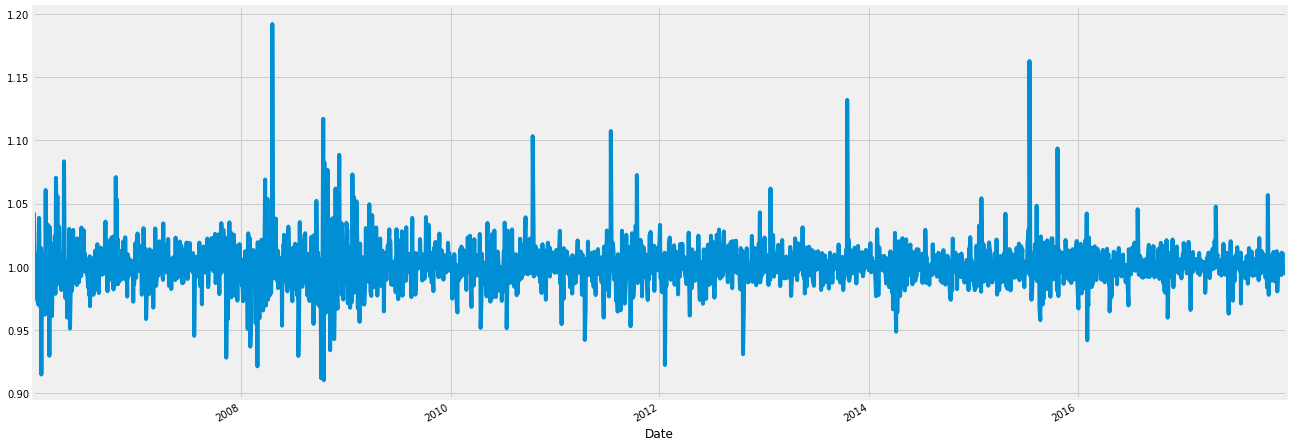

In [96]:
google['Change'] = google.High.div(google.High.shift())
google['Change'].plot(figsize=(20,8))

In [98]:
google.head()

,Open,High,Low,Close,Volume,Name,Change
Date,,,,,,,
2006-01-03,211.47,218.05,209.32,217.83,13137450,GOOGL,NaN
2006-01-04,222.17,224.70,220.09,222.84,15292353,GOOGL,1.030498
2006-01-05,223.22,226.00,220.97,225.85,10815661,GOOGL,1.005785
2006-01-06,228.66,235.49,226.85,233.06,17759521,GOOGL,1.041991
2006-01-09,233.44,236.94,230.70,233.68,12795837,GOOGL,1.006157


## 2.2 Stock returns
전과 price가 같다면, 변한 정도는 1로 표기될 것입니다. <br>

그렇기에 (비율-1) * 100 의 식을 사용하여 %로 변환합니다.

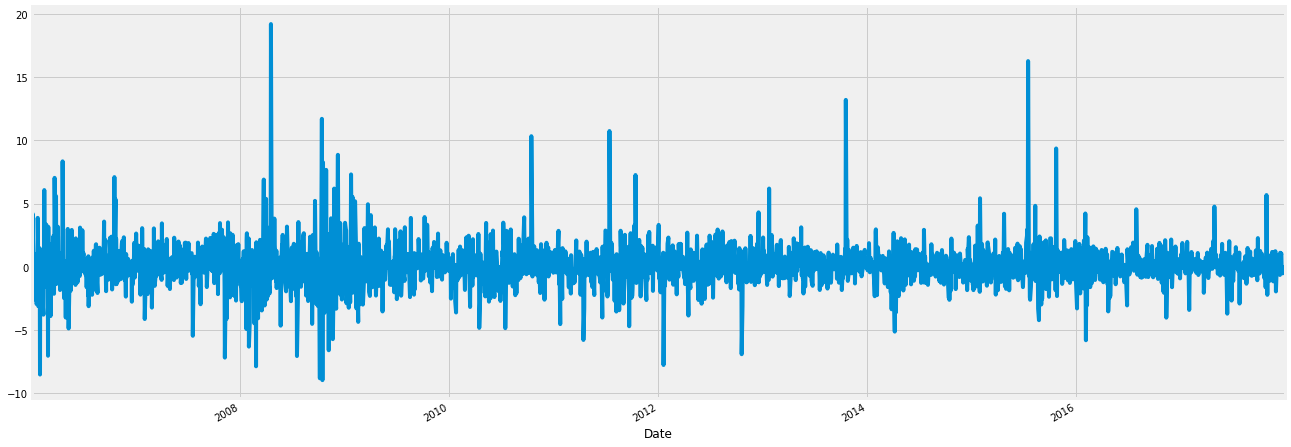

In [99]:
google['Return'] = google.Change.sub(1).mul(100)
google['Return'].plot(figsize=(20,8))
plt.show()

In [100]:
google.head()

,Open,High,Low,Close,Volume,Name,Change,Return
Date,,,,,,,,
2006-01-03,211.47,218.05,209.32,217.83,13137450,GOOGL,NaN,NaN
2006-01-04,222.17,224.70,220.09,222.84,15292353,GOOGL,1.030498,3.049759
2006-01-05,223.22,226.00,220.97,225.85,10815661,GOOGL,1.005785,0.578549
2006-01-06,228.66,235.49,226.85,233.06,17759521,GOOGL,1.041991,4.199115
2006-01-09,233.44,236.94,230.70,233.68,12795837,GOOGL,1.006157,0.615737


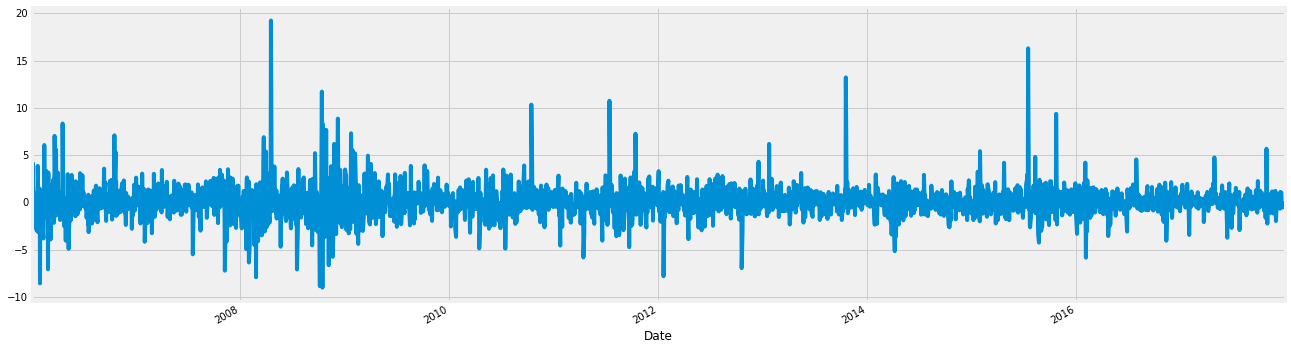

In [101]:
# 위 결과를 한줄로 작성할 경우
google.High.pct_change().mul(100).plot(figsize=(20,6)) # Another way to calculate returns

## 2.3 Absolute change in successive rows
값 자체의 차이는 diff()를 사용하여 구할 수 있습니다.

In [104]:
google.head()

,Open,High,Low,Close,Volume,Name,Change,Return
Date,,,,,,,,
2006-01-03,211.47,218.05,209.32,217.83,13137450,GOOGL,NaN,NaN
2006-01-04,222.17,224.70,220.09,222.84,15292353,GOOGL,1.030498,3.049759
2006-01-05,223.22,226.00,220.97,225.85,10815661,GOOGL,1.005785,0.578549
2006-01-06,228.66,235.49,226.85,233.06,17759521,GOOGL,1.041991,4.199115
2006-01-09,233.44,236.94,230.70,233.68,12795837,GOOGL,1.006157,0.615737


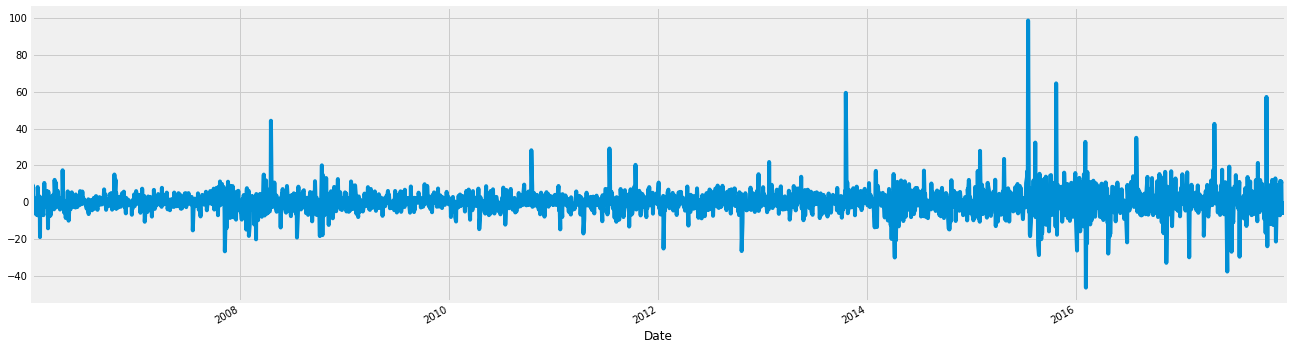

In [105]:
google.High.diff().plot(figsize=(20,6))

## 2.4 Comparing two or more time series
normalization을 통해 2개의 시계열을 비교해보겠습니다. <br>

두 개의 시계열을 각 시계열의 첫 번째 요소로 나누어주어, 비율의 변화를 보는 방법입니다. 두 시리즈의 시작점이 1.0으로 같아 비교가 용이합니다.<br>

이제 구글 주식과 함께 MS 주식 데이터를 불러오겠습니다.

In [106]:
mcd = pd.read_csv('./MCD_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=['Date'])

In [107]:
mcd.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,34.29,34.29,33.20,33.52,9250100,MCD
2006-01-04,33.43,33.85,33.42,33.82,5990300,MCD
2006-01-05,33.82,34.20,33.73,33.86,6245200,MCD
2006-01-06,34.23,34.30,33.81,34.06,5877100,MCD
2006-01-09,34.00,34.74,33.99,34.71,4659900,MCD


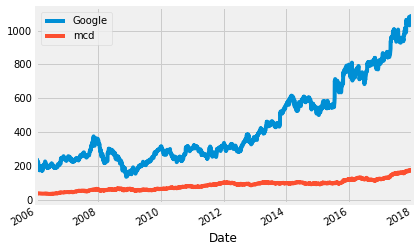

In [111]:
# Plotting before normalization
google.High.plot()
mcd.High.plot()
plt.legend(['Google','mcd'])
plt.show()

아래는 변환 후 그래프입니다.

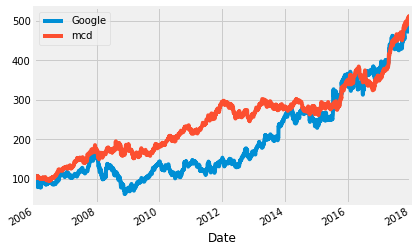

In [115]:
normalized_google=google.High.div(google.High.iloc[0]).mul(100)
normalized_mcd = mcd.High.div(mcd.High.iloc[0]).mul(100)
normalized_google.plot()
normalized_mcd.plot()
plt.legend(['Google','mcd'])
plt.show()

## 2.5 Window functions
Window functions는 서브-기간을 식별하고, 서브-기간간의 연산에 사용합니다.
* Rolling : 일정 구간에서 움직이며 값의 경향성을 구함
* Expanding : Contains all prior values <br>

아래는 각 데이터를 90일 window를 이동시키며 평균으로 ploting한 예시입니다.

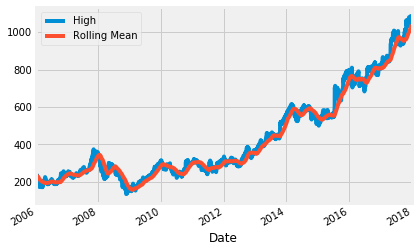

In [118]:
rolling_google=google.High.rolling('90D').mean()
google.High.plot()
rolling_google.plot()
plt.legend(['High','Rolling Mean'])
# Plotting a rolling mean of 90 day window with original High attribute of google stocks
plt.show()

원본보다 롤링한 값이 부드러운 것을 확인할 수 있습니다. <br>

아래는 expanding 예시입니다. default값은 1입니다.

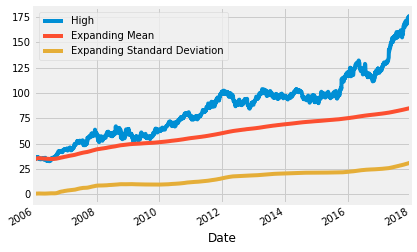

In [123]:
# Expanding window functions
mcd_mean = mcd.High.expanding().mean()
mcd_std = mcd.High.expanding().std()
mcd.High.plot()
mcd_mean.plot()
mcd_std.plot()
plt.legend(['High','Expanding Mean','Expanding Standard Deviation'])
plt.show()

## 2.6 OHLC charts
plotly.graph_objs 모듈을 사용하여 Ohlc 차트를 그려보겠습니다.

In [173]:
import plotly 
plotly.offline.plot

<function plotly.offline.offline.plot(figure_or_data, show_link=False, link_text='Export to plot.ly', validate=True, output_type='file', include_plotlyjs=True, filename='temp-plot.html', auto_open=True, image=None, image_filename='plot_image', image_width=800, image_height=600, config=None, include_mathjax=False, auto_play=True, animation_opts=None)>

In [ ]:
trace = go.Ohlc(x=google['06-2008'].index,
                open=google['06-2008'].Open,
                high=google['06-2008'].High,
                low=google['06-2008'].Low,
                close=google['06-2008'].Close)
data = [trace]
iplot(data, filename='simple_ohlc')

## 2.8 Autocorrelation and Partial Autocorrelation
* Autocorrelation : The autocorrelation function (ACF)은 lags만큼 이동시킨 자기자신과의 공분산을 의미합니다. 정확히는 공분산을 normalization한 값입니다. 현재와 과거의 연관성을 확인할 수 있습니다. 자기상관이라고도 합니다.

* Partial Autocorrelation : 부분적인 autocorrelation을 의미합니다. 편자기상관함수라고도 불립니다. 시간단위로 구분된 시계열간의 자기상관도를 확인합니다. <br>

일반적으로 추세를 확인하고 이동 평균 매개 변수의 가능한 값을 추론하는 데 ACF를 사용하고 자동 회귀 부분에는 PACF를 사용합니다.

### Autocorrelation

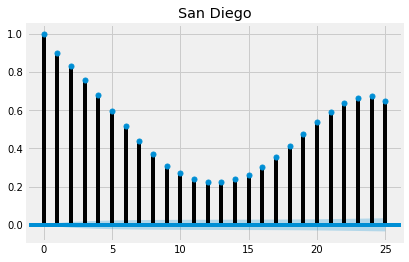

In [180]:
plot_acf(humidity['San Diego'], lags=25, title="San Diego")
plt.show()

모든 지연은 1에 가깝거나 또는 적어도 신뢰 구간보다 크므로 통계적으로 유의합니다.

### Partial Autocorrelation

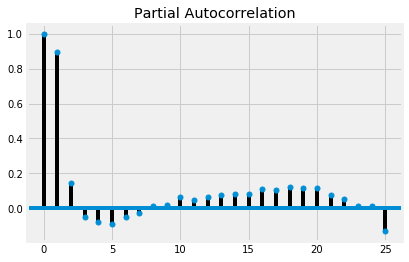

In [185]:
plot_pacf(humidity['San Diego'], lags=25)
plt.show()

처음 2개 이후 매우 낮은 값을 가집니다.

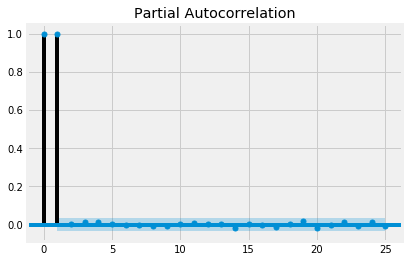

In [187]:
# Partial Autocorrelation of closing price of microsoft stocks
plot_pacf(mcd["Close"],lags=25)
plt.show()

여기서 0번째, 1번째 lags만 통계적으로 중요합니다.

# 3. Time series decomposition and Random walks
## 3.1 Trends, seasonality and noise
시계열에는 다음과 같은 요소가 있습니다.

* Trend : 시계열에서 일정한 상승 또는 하강 기울기
* Seasonality : 시계열에서 명확한 패턴 (사인함수와 같이)
* Noise : 특이점(Outliers) 또는 누락 데이터

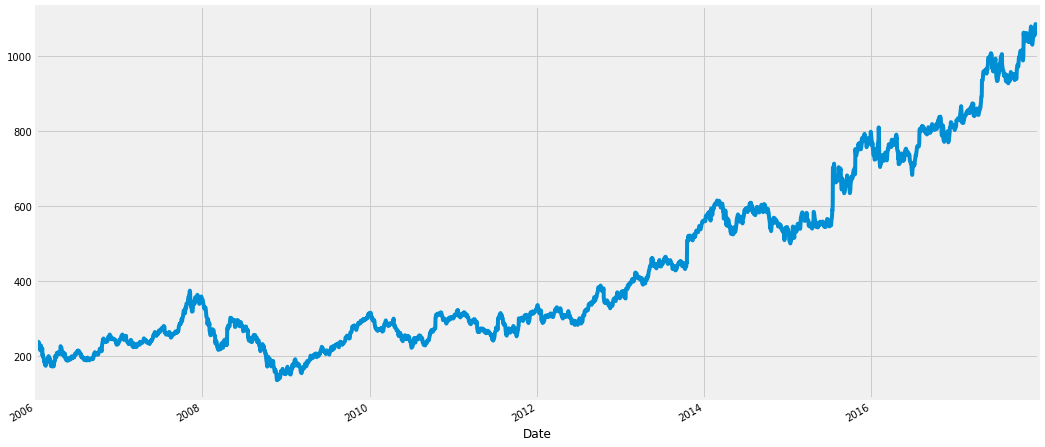

In [188]:
google['High'].plot(figsize=(16,8))
plt.show()

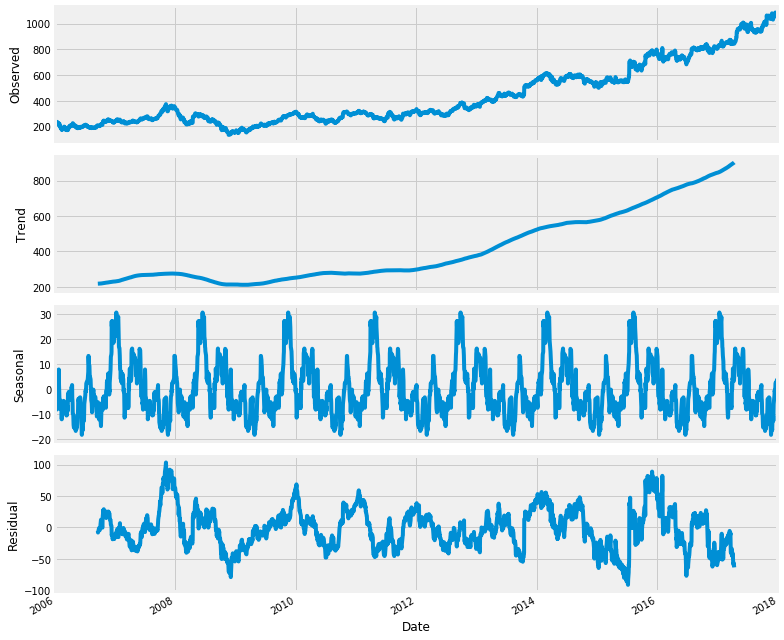

In [192]:
rcParams['figure.figsize'] = 11,9
decomposed_google_volume =sm.tsa.seasonal_decompose(google['High'], freq=360)
figure = decomposed_google_volume.plot()
plt.show()

* 위 그래프에서는 분명한 상승 trend가 있습니다.
* seasonal change는 균일한 것을 확인할 수 있습니다.
* 특이점과 누락 데이터는 균일하지 않은 것을 확인할 수 있습니다.

## 3.2. White noise
시계열 분석에서 White noise는 서로 독립적이고 평균과 분산이 일정한 잡음입니다. 자기상환함수나 편자기상관함수의 값이 유의수준보다 작으면 백색잡음으로 판단합니다. <br>

White noise는 다음과 같은 성질을 가지고 있습니다. 많은 수계열 모형들의 불규칙한 패턴을 의미하고, 정규분포에서 추출된 임의의 수치라고 규정하고 있습니다. 모델의 해석을 전반적으로 편리하게 만듭니다. <br>

* Constant mean : 일정한 평균
* Constant variance : 일정한 분산
* Zero auto-correlation at all lags : 모든 lag에 대해 자기상관계수가 0

아래는 white noise 예시입니다.

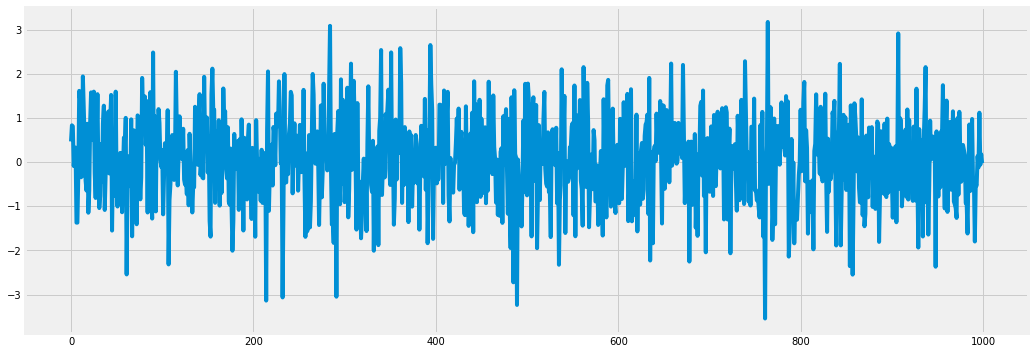

In [194]:
rcParams['figure.figsize'] = 16,6
white_noise = np.random.normal(loc=0, scale=1, size=1000)
# loc is mean, scale is variance
plt.plot(white_noise)

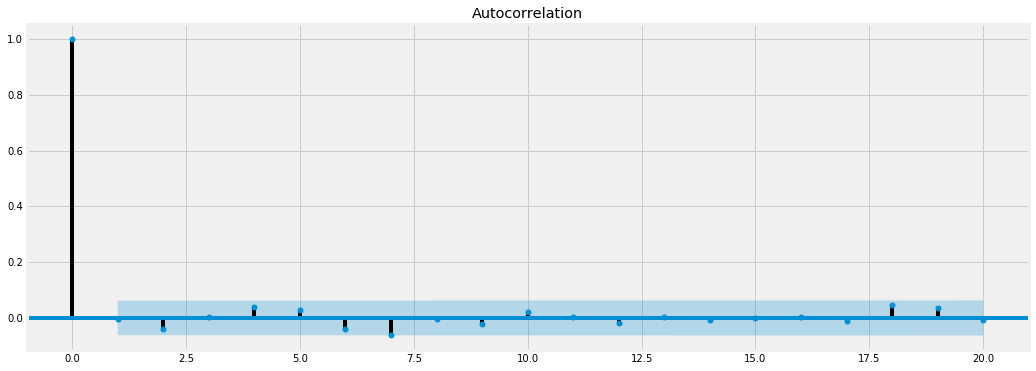

In [195]:
plot_acf(white_noise, lags=20)
plt.show()

## 3.3. Random Walk
random walk는 확률론적 랜덤 프로세스로, 단순한 시뮬레이션 입니다. 시계열에서 주식, 정수(integer)과 같은 수 단위의 시스템에서 다음 행동의 확률을 통해 미래를 예측하는 모델링입니다. <br>

주식에서는 보통 다음과 같은 형태가 나타납니다<br>

Today's Price = Yesterday's Price + Noise<br>

즉, 오늘의 가격은 어제의 가격 + 노이즈인거죠.<br>

### Augmented Dickey-Fuller test
An augmented Dickey–Fuller test (ADF)는 시계열 샘플에서 단위근이 존재한다는 검정 방법입니다. Dickey-Fuller에서 lag를 보다 확장하여 사용할 수 있습니다. <br>

각 데이터에서 귀무가설 검정을 해보겠습니다

In [197]:
# Augmented Dickey-Fuller test on volume of google and microsoft stocks 
adf = adfuller(mcd["Volume"])
print("p-value of mcd: {}".format(float(adf[1])))
adf = adfuller(google["Volume"])
print("p-value of google: {}".format(float(adf[1])))

p-value of mcd: 1.743983093194842e-05
p-value of google: 6.510719605768603e-07


각 데이터 결과는 다음과 같이 해석할 수 있습니다.<br>

As mcd has p-value 0.0003201525 which is less than 0.05, null hypothesis is rejected and this is not a random walk. <br>
Now google has p-value 0.0000006510 which is more than 0.05, null hypothesis is rejected and this is not a random walk.<br>


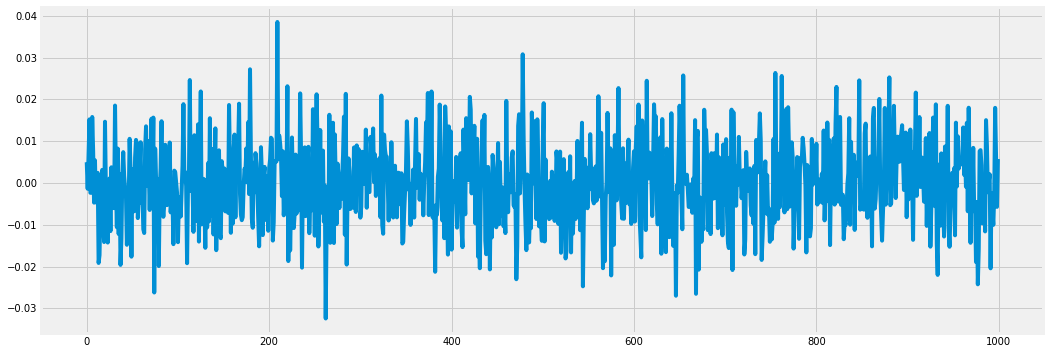

In [201]:
seed(42)
rcParams['figure.figsize'] = 16, 6
random_walk = normal(loc=0, scale=0.01, size=1000)
plt.plot(random_walk)
plt.show()

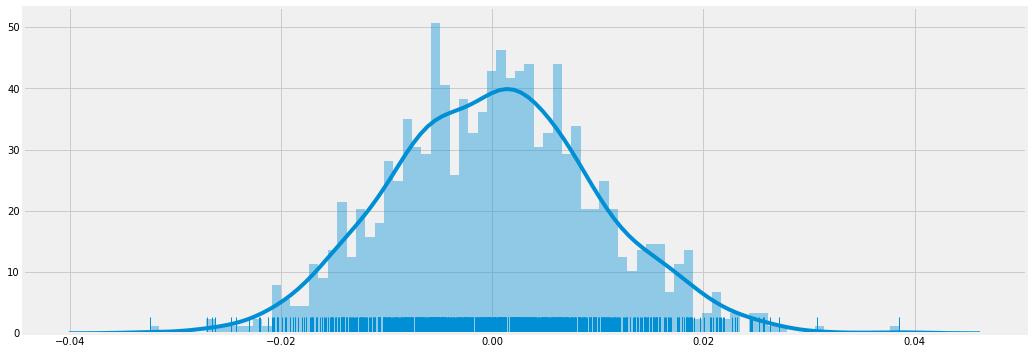

In [212]:
import seaborn as sns
sns.distplot(random_walk, kde=True, rug=True, bins=80)
plt.show()

## 3.4 Stationarity
A stationary time series는 평균, 분산, 자기 상관 등의 통계적 특성이 모든 시간에 대해 일정한 시계열입니다. 정상성이라고도 합니다. 보통 시계열 기법은 데이터가 정상적이라고 가정하고 진행하기에 중요한 특성입니다. <br>

이것도 strong과 weak, 두 가지로 나뉩니다.<br>

* Strong stationarity : 어떠한 시점들의 결합확률밀도함수가 시간 축을 이동하여도 변화하지 않는 것
* Weak stationarity: 평균과 분산이 각각 상수이며 자기상관도(자기공분산)이 시차 k만 의존하고 시점 t와는 무관할떄를 의미합니다. <br>

비정상성(non-stationary) 시계열은 분석하기 어렵기 때문에 정상(stationary) 시계열로 변화시켜줘야합니다. 이는 diff()로 쉽게 변환해줄 수 있습니다. (shift 1)

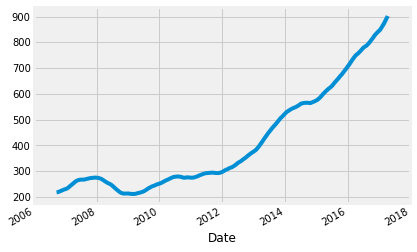

In [217]:
decomposed_google_volume.trend.plot()

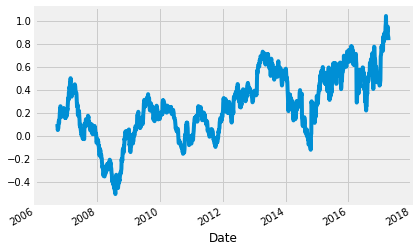

In [218]:
decomposed_google_volume.trend.diff().plot()

# 4. Modelling using statstools
## 4.1 AR models
자동회귀(autoregressive, AR) 모델은 랜덤 프로세스 중 하나입니다. 자연과 경제와 같이 시간이 변하는 일정 과정을 설명할 떄 사용합니다.  <br>
자동회귀 모델은 출력 변수가 과거의 값들에 선형 가중합으로 이루어진다는 점을 기반으로 하고 있습니다. 그렇기에 이 모델의 형태들은 선형 식에 따라 다양한 형태를 띕니다. <br>

**AR(1) model** <br>
Rt = μ + ϕRt-1 + εt <br>

* If ϕ = 1, it is random walk.
* Else if ϕ = 0, it is white noise
* Else if -1 < ϕ < 1, it is stationary
* If ϕ is -ve, there is men reversion. If ϕ is +ve, there is momentum.

**AR(2) model**  <br>
Rt = μ + ϕ1Rt-1 + ϕ2Rt-2 + εt <br>

**AR(3) model** <br>
Rt = μ + ϕ1Rt-1 + ϕ2Rt-2 + ϕ3Rt-3 + εt<br>

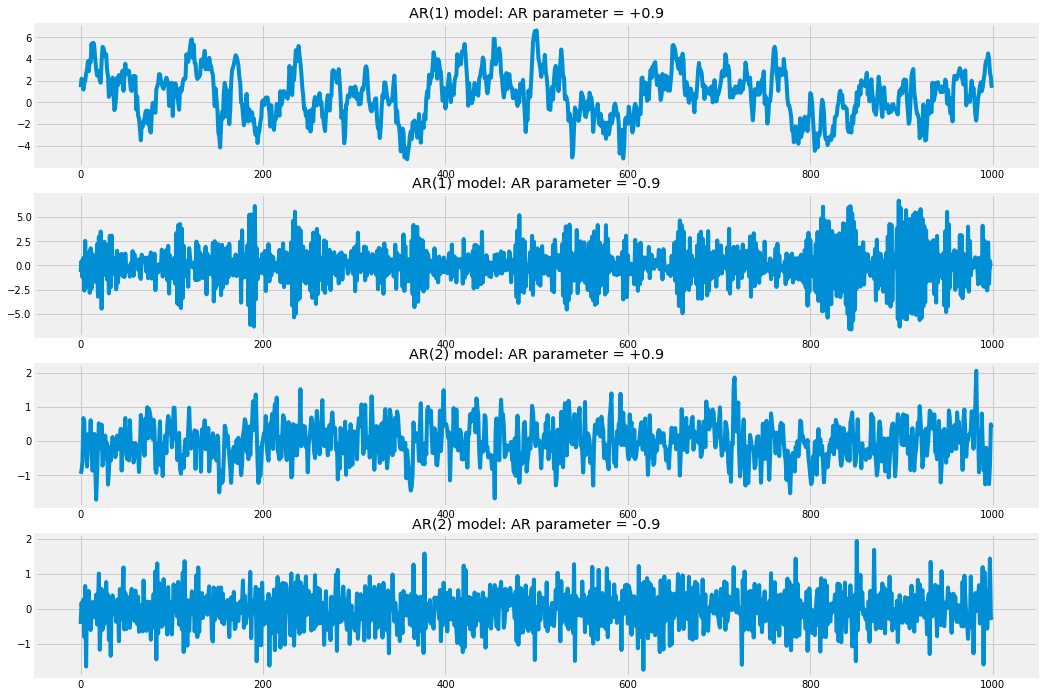

In [225]:
# AR(1) MA(1) model:AR parameter = +0.9
rcParams['figure.figsize'] = 16, 12
plt.subplot(4,1,1)
ar1 = np.array([1, -0.9]) # We choose -0.9 as AR parameter is +0.9
ma1 = np.array([1])
AR1 = ArmaProcess(ar1, ma1)
sim1 = AR1.generate_sample(nsample=1000)
plt.title('AR(1) model: AR parameter = +0.9')
plt.plot(sim1)
# We will take care of MA model later
# AR(1) MA(1) AR parameter = -0.9
plt.subplot(4,1,2)
ar2 = np.array([1, 0.9]) # We choose +0.9 as AR parameter is -0.9
ma2 = np.array([1])
AR2 = ArmaProcess(ar2, ma2)
sim2 = AR2.generate_sample(nsample=1000)
plt.title('AR(1) model: AR parameter = -0.9')
plt.plot(sim2)
# AR(2) MA(1) AR parameter = 0.9
plt.subplot(4,1,3)
ar3 = np.array([2, -0.9]) # We choose -0.9 as AR parameter is +0.9
ma3 = np.array([1])
AR3 = ArmaProcess(ar3, ma3)
sim3 = AR3.generate_sample(nsample=1000)
plt.title('AR(2) model: AR parameter = +0.9')
plt.plot(sim3)
# AR(2) MA(1) AR parameter = -0.9
plt.subplot(4,1,4)
ar4 = np.array([2, 0.9]) # We choose +0.9 as AR parameter is -0.9
ma4 = np.array([1])
AR4 = ArmaProcess(ar4, ma4)
sim4 = AR4.generate_sample(nsample=1000)
plt.title('AR(2) model: AR parameter = -0.9')
plt.plot(sim4)
plt.show()

### Forecasting a simulated model

In [226]:
model = ARMA(sim1, order=(1,0))
result = model.fit()
print(result.summary())
print("μ={} ,ϕ={}".format(result.params[0],result.params[1]))

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(1, 0)   Log Likelihood               -1415.701
Method:                       css-mle   S.D. of innovations              0.996
Date:                Tue, 12 Nov 2019   AIC                           2837.403
Time:                        10:16:18   BIC                           2852.126
Sample:                             0   HQIC                          2842.998
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7072      0.288      2.454      0.014       0.142       1.272
ar.L1.y        0.8916      0.014     62.742      0.000       0.864       0.919
                                    Roots           

ϕ is around 0.9 which is what we chose as AR parameter in our first simulated model.

### Predicting the models

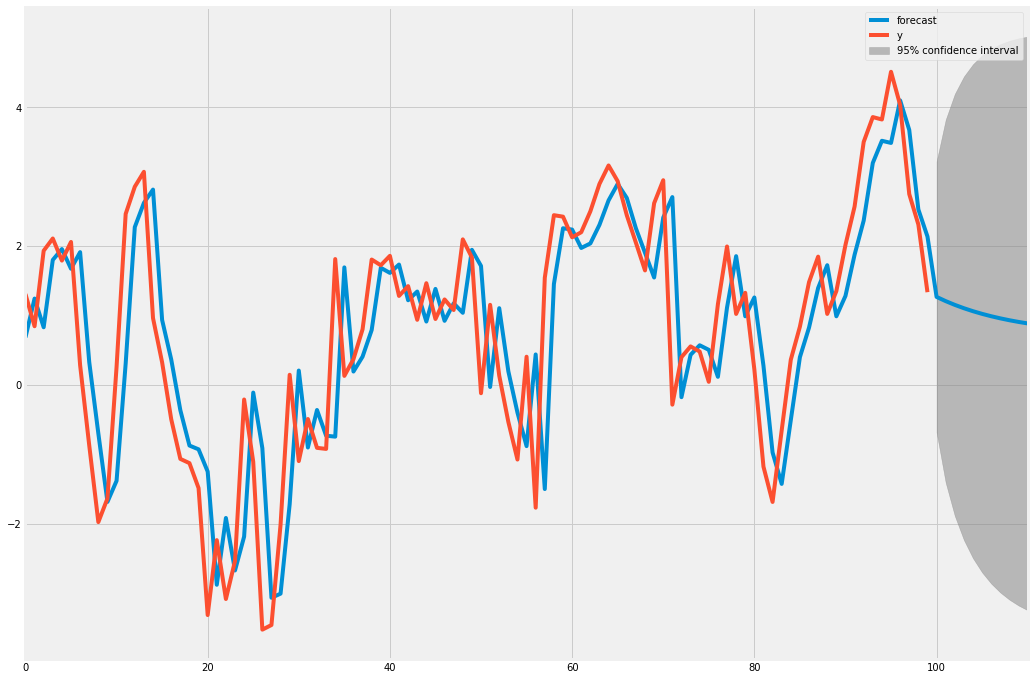

In [227]:
# Predicting simulated AR(1) model 
result.plot_predict(start=900, end=1010)
plt.show()

In [228]:
rmse = math.sqrt(mean_squared_error(sim1[900:1011], result.predict(start=900,end=999)))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 1.0408054567262348.


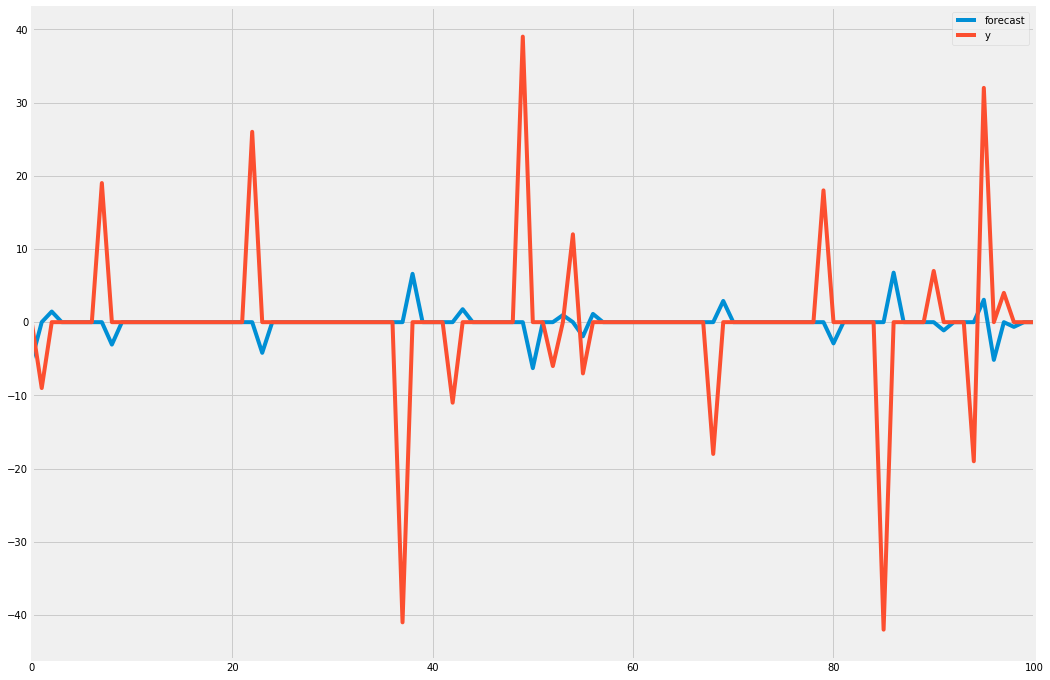

In [229]:
# Predicting humidity level of Montreal
humid = ARMA(humidity["Montreal"].diff().iloc[1:].values, order=(1,0))
res = humid.fit()
res.plot_predict(start=1000, end=1100)
plt.show()

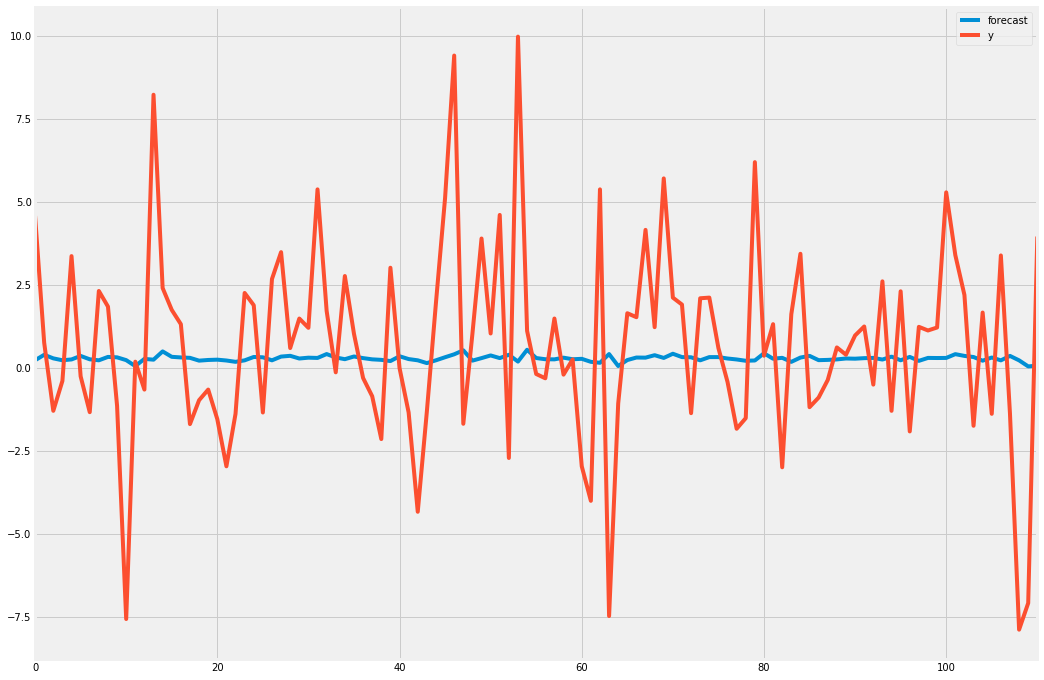

In [230]:
# Predicting closing prices of google
humid = ARMA(google["Close"].diff().iloc[1:].values, order=(1,0))
res = humid.fit()
res.plot_predict(start=900, end=1010)
plt.show()

## 4.2 MA models
이동 평균(moving-avergage, MA) 모델은 평균값 자체가 시간에 따라 변화하는 경향성을 보는 모델입니다. <br>
AR모델은 값 자체에 초점을 뒀다면 여기서는 이전에 발생한 error(noise)값을 초점으로 둡니다. <br>

**MA(1) model** <br>
Rt = μ + ϵt1 + θϵt-1 <br>

Today's returns = mean + today's noise + yesterday's noise<br>

오늘의 값 = 평균 + 오늘의 노이즈 + 어제의 노이즈<br>

마찬가지로 MA(1)은 lag이 1인 MA모델입니다.<br>

### Simulating MA(1) model

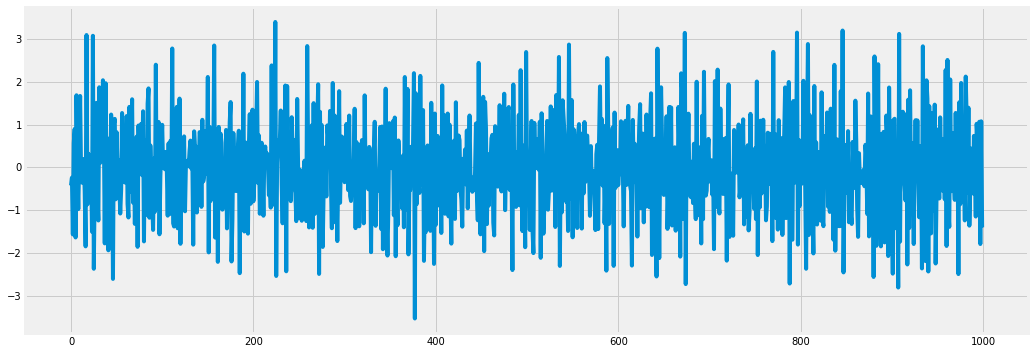

In [231]:
rcParams['figure.figsize'] = 16, 6
ar1 = np.array([1])
ma1 = np.array([1, -0.5])
MA1 = ArmaProcess(ar1, ma1)
sim1 = MA1.generate_sample(nsample=1000)
plt.plot(sim1)

### Forecasting the simulated MA model

In [232]:
model = ARMA(sim1, order=(0,1))
result = model.fit()
print(result.summary())
print("μ={} ,θ={}".format(result.params[0],result.params[1]))

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(0, 1)   Log Likelihood               -1423.276
Method:                       css-mle   S.D. of innovations              1.004
Date:                Tue, 12 Nov 2019   AIC                           2852.553
Time:                        10:21:44   BIC                           2867.276
Sample:                             0   HQIC                          2858.148
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0228      0.014     -1.652      0.099      -0.050       0.004
ma.L1.y       -0.5650      0.027    -20.797      0.000      -0.618      -0.512
                                    Roots           

### Prediction using MA models

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                45251
Model:                     ARMA(0, 3)   Log Likelihood             -153516.982
Method:                       css-mle   S.D. of innovations              7.197
Date:                Tue, 12 Nov 2019   AIC                         307043.965
Time:                        10:22:28   BIC                         307087.564
Sample:                             0   HQIC                        307057.686
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0008      0.031     -0.025      0.980      -0.061       0.060
ma.L1.y       -0.1621      0.005    -34.507      0.000      -0.171      -0.153
ma.L2.y        0.0386      0.005      8.316      0.0

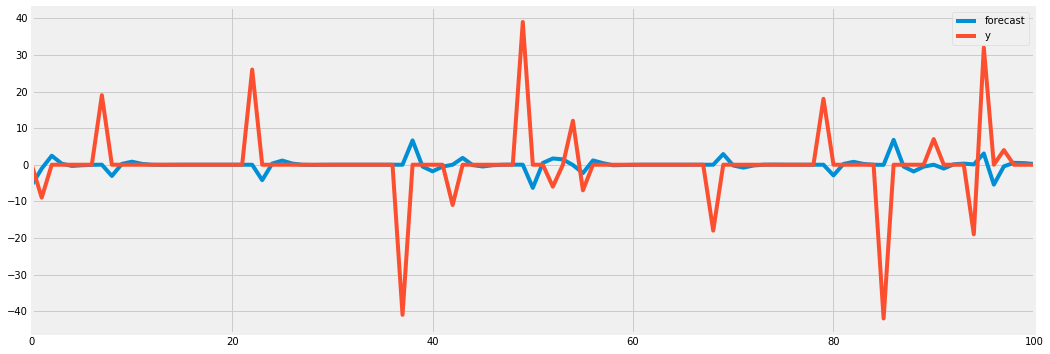

In [233]:
# Forecasting and predicting montreal humidity
model = ARMA(humidity["Montreal"].diff().iloc[1:].values, order=(0,3))
result = model.fit()
print(result.summary())
print("μ={} ,θ={}".format(result.params[0],result.params[1]))
result.plot_predict(start=1000, end=1100)
plt.show()

In [241]:
rmse = math.sqrt(mean_squared_error(humidity["Montreal"].diff().iloc[1000:1101].values, result.predict(start=1000,end=1100)))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 11.345130161821896.


## 4.3 ARMA models
AR과 MA의 모델을 합친 모델입니다. <br>

**ARMA(1,1) model** <br>
Rt = μ + ϕRt-1 + ϵt + θϵt-1 <br>

Basically, Today's return = mean + Yesterday's return + noise + yesterday's noise. <br>
오늘의 값 = 평균 + 어제의 값 + 노이즈 + 어제의 노이즈

### Prediction using ARMA models

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 3019
Model:                     ARMA(3, 3)   Log Likelihood              -49209.585
Method:                       css-mle   S.D. of innovations        2901294.382
Date:                Tue, 12 Nov 2019   AIC                          98435.170
Time:                        10:25:44   BIC                          98483.272
Sample:                             0   HQIC                         98452.467
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2334.6539   1732.053     -1.348      0.178   -5729.415    1060.108
ar.L1.y        0.4611      0.072      6.372      0.000       0.319       0.603
ar.L2.y        0.7947      0.063     12.596      0.0

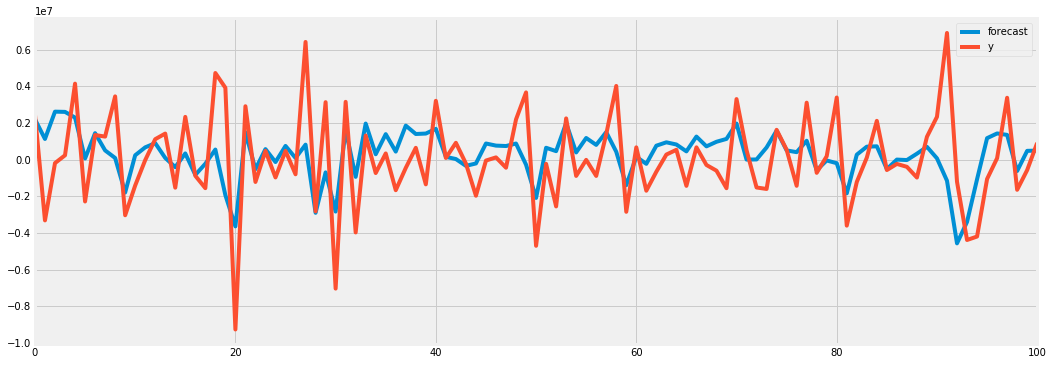

In [243]:
# Forecasting and predicting microsoft stocks volume
model = ARMA(mcd["Volume"].diff().iloc[1:].values, order=(3,3))
result = model.fit()
print(result.summary())
print("μ={}, ϕ={}, θ={}".format(result.params[0],result.params[1],result.params[2]))
result.plot_predict(start=1000, end=1100)
plt.show()

In [245]:
rmse = math.sqrt(mean_squared_error(mcd["Volume"].diff().iloc[1000:1101].values, result.predict(start=1000,end=1100)))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 3454752.5479827705.


AR, MA 모델에 비해 좋은 결과가 나오는 것을 확인할 수 있습니다.

## 4.4 ARIMA models
autoregressive integrated moving average (ARIMA) model은 ARMA가 과거의 데이터들을 사용하는 것에 반해  <br>
ARIMA 모형은 이것을 넘어서 과거의 데이터가 지니고 있던 추세(momentum)까지 반영하는 모델입니다.

**ARIMA(1,0,0)**  <br>
yt = a1yt-1 + ϵt <br>

**ARIMA(1,0,1)** <br>
yt = a1yt-1 + ϵt + b1ϵt-1 <br>

**ARIMA(1,1,1)**<br>
Δyt = a1Δyt-1 + ϵt + b1ϵt-1 where Δyt = yt - yt-1 <br>

### Prediction using ARIMA model

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 3018
Model:                 ARIMA(2, 1, 0)   Log Likelihood              -50164.192
Method:                       css-mle   S.D. of innovations        4003186.668
Date:                Tue, 12 Nov 2019   AIC                         100336.384
Time:                        10:29:03   BIC                         100360.434
Sample:                             1   HQIC                        100345.032
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1213.2217   3.28e+04      0.037      0.971   -6.31e+04    6.55e+04
ar.L1.D.y     -0.8209      0.017    -49.217      0.000      -0.854      -0.788
ar.L2.D.y     -0.4000      0.017    -23.986      0.0

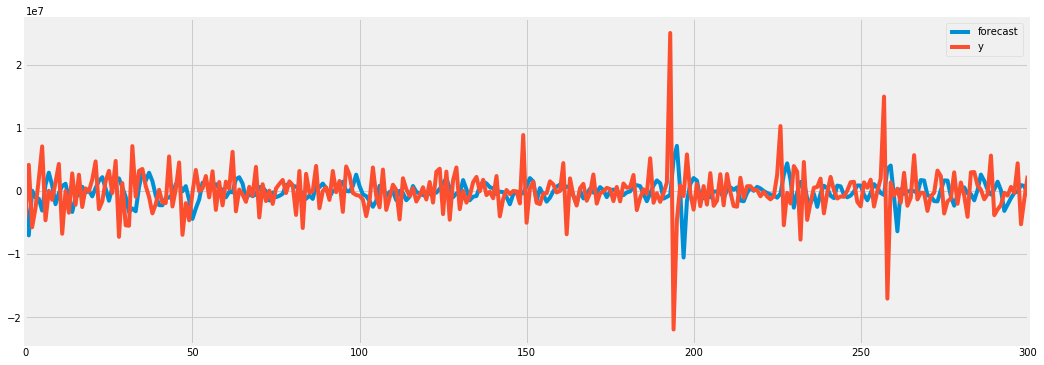

In [247]:
# Predicting the mcd stocks volume
rcParams['figure.figsize'] = 16, 6
model = ARIMA(mcd["Volume"].diff().iloc[1:].values, order=(2,1,0))
result = model.fit()
print(result.summary())
result.plot_predict(start=700, end=1000)
plt.show()

In [249]:
rmse = math.sqrt(mean_squared_error(mcd["Volume"].diff().iloc[700:1001].values, result.predict(start=700,end=1000)))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 7242999.496963644.


## 4.5 VAR models
Vector autoregression (VAR) 모델은 벡터 시계열에 대한 모델입니다. 여러 시계열에 대한 선형 상호종속성을 확인하는데 사용합니다.  <br>
하나 이상의 변수를 허용하며 단일 변수 AR을 일반화한 모델입니다.

                           Statespace Model Results                           
Dep. Variable:     ['Close', 'Close']   No. Observations:                 3019
Model:                     VARMA(2,1)   Log Likelihood              -13934.462
                          + intercept   AIC                          27902.924
Date:                Tue, 12 Nov 2019   BIC                          28005.139
Time:                        10:33:18   HQIC                         27939.679
Sample:                             0                                         
                               - 3019                                         
Covariance Type:                  opg                                         
Ljung-Box (Q):                  nan, 43.75   Jarque-Bera (JB):   49669.43, 12208.97
Prob(Q):                         nan, 0.32   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         3.33, 1.90   Skew:                       1.15, 0.35
Prob(H) (two-sided):            0.00,

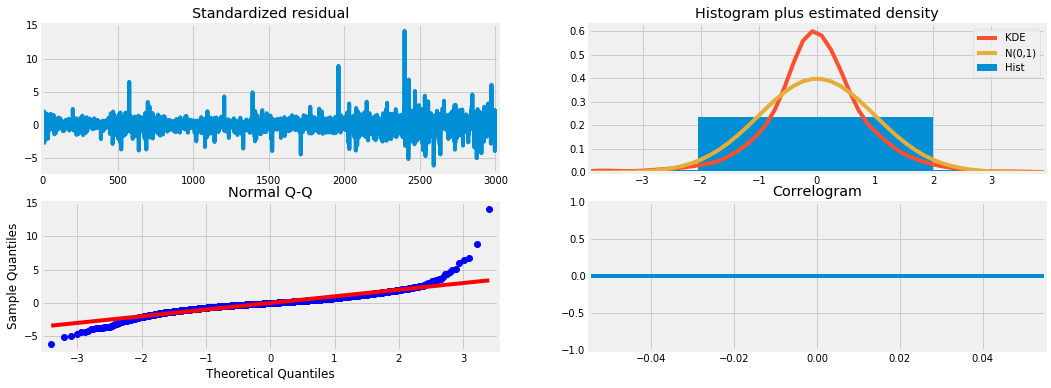

In [250]:
# Predicting closing price of Google and mcd
train_sample = pd.concat([google["Close"].diff().iloc[1:],mcd["Close"].diff().iloc[1:]],axis=1)
model = sm.tsa.VARMAX(train_sample,order=(2,1),trend='c')
result = model.fit(maxiter=1000,disp=False)
print(result.summary())
predicted_result = result.predict(start=0, end=1000)
result.plot_diagnostics()
# calculating error
rmse = math.sqrt(mean_squared_error(train_sample.iloc[1:1002].values, predicted_result.values))
print("The root mean squared error is {}.".format(rmse))

## 4.6 State Space methods
상태 공간 모형(state space model)이란 시계열 생성 구조를 상태 전이식(state transition equation)과 관측식(observation equation)이라는 두 개의 수식으로 정의하는 시계열 모형을 말한다.

### 4.6.1 SARIMA models
계절형 자기회귀 이동평균모형(Seasonal ARIMA, SARIMA)은 각 season에 따른 독립적인 ARIMA 모형이 합쳐져 있는 모형입니다.<br>
season의 주기를 나타내는 차수가 추가적으로 필요합니다.

                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                 3018
Model:               SARIMAX(4, 0, 4)   Log Likelihood              -10097.641
Date:                Tue, 12 Nov 2019   AIC                          20215.281
Time:                        10:35:34   BIC                          20275.405
Sample:                             0   HQIC                         20236.901
                               - 3018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1075      0.048      2.235      0.025       0.013       0.202
ar.L1          0.2299      0.006     35.759      0.000       0.217       0.242
ar.L2          1.1206      0.005    221.009      0.0

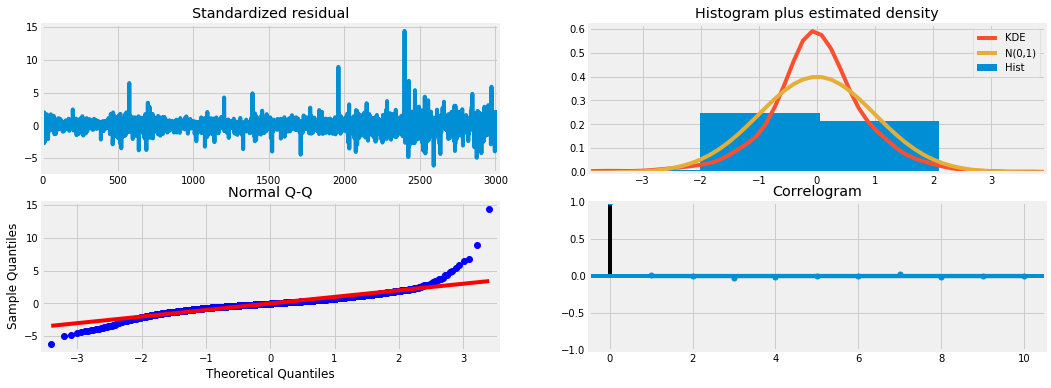

In [251]:
# Predicting closing price of Google'
train_sample = google["Close"].diff().iloc[1:].values
model = sm.tsa.SARIMAX(train_sample,order=(4,0,4),trend='c')
result = model.fit(maxiter=1000,disp=False)
print(result.summary())
predicted_result = result.predict(start=0, end=500)
result.plot_diagnostics()
# calculating error
rmse = math.sqrt(mean_squared_error(train_sample[1:502], predicted_result))
print("The root mean squared error is {}.".format(rmse))

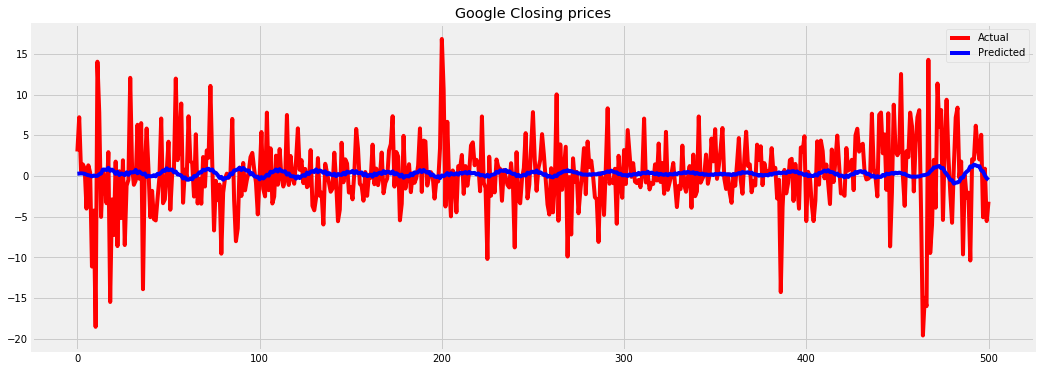

In [252]:
plt.plot(train_sample[1:502],color='red')
plt.plot(predicted_result,color='blue')
plt.legend(['Actual','Predicted'])
plt.title('Google Closing prices')
plt.show()

### 4.6.2 Unobserved components
구조화 모형(structural model)또는 Unobserved Component 모형으로 불리는 모델입니다. <br>

보이지 않는 trend, seasonal, cyclical, autoregressive, regression 성분을 추정하여 사용하는 모형입니다.<br>

이 모델은 다음 형태를 따릅니다.

                        Unobserved Components Results                         
Dep. Variable:                      y   No. Observations:                 3018
Model:                    local level   Log Likelihood              -10116.511
Date:                Tue, 12 Nov 2019   AIC                          20237.023
Time:                        10:37:22   BIC                          20249.047
Sample:                             0   HQIC                         20241.346
                               - 3018                                         
Covariance Type:                  opg                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
sigma2.irregular    47.7219      0.384    124.248      0.000      46.969      48.475
sigma2.level      5.033e-05      0.000      0.458      0.647      -0.000       0.000
Ljung-Box (Q):              

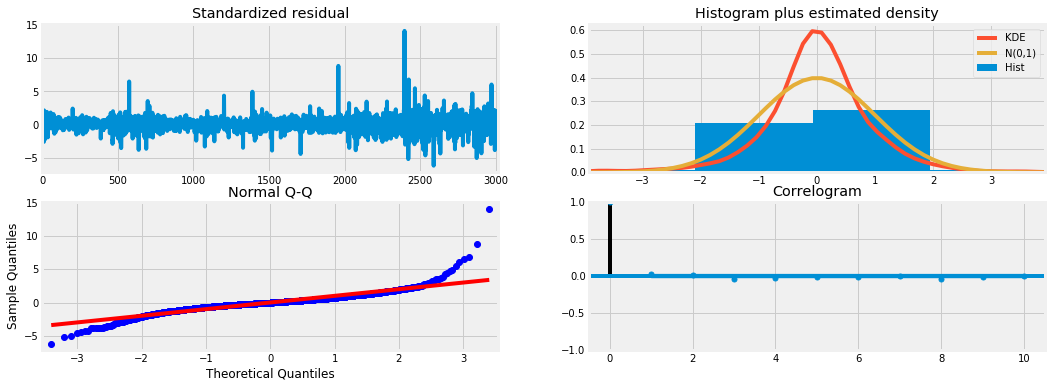

In [253]:
# Predicting closing price of Google'
train_sample = google["Close"].diff().iloc[1:].values
model = sm.tsa.UnobservedComponents(train_sample,'local level')
result = model.fit(maxiter=1000,disp=False)
print(result.summary())
predicted_result = result.predict(start=0, end=500)
result.plot_diagnostics()
# calculating error
rmse = math.sqrt(mean_squared_error(train_sample[1:502], predicted_result))
print("The root mean squared error is {}.".format(rmse))

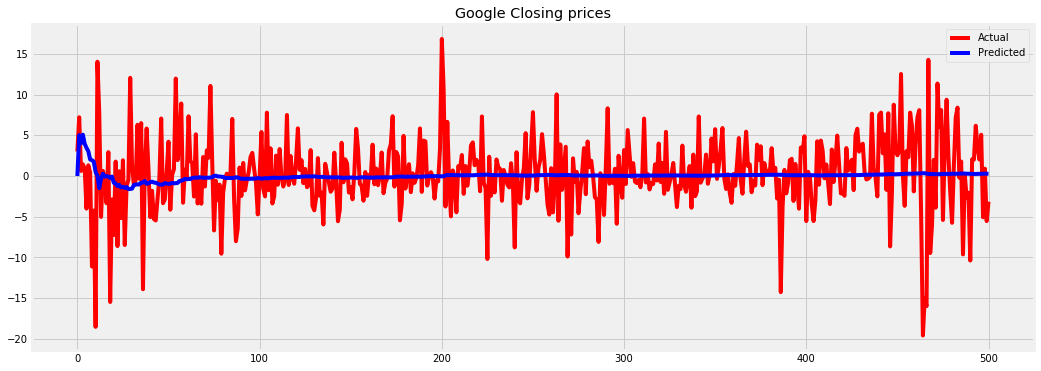

In [254]:
plt.plot(train_sample[1:502],color='red')
plt.plot(predicted_result,color='blue')
plt.legend(['Actual','Predicted'])
plt.title('Google Closing prices')
plt.show()

경험상 시계열 예측에 가장 적합한 모델은 LSTM 기반의 RNN 모델입니다. 이를 위해 더 상세한 튜토리얼을 준비했고, 링크는 아래와 같습니다.
* https://www.kaggle.com/thebrownviking20/intro-to-recurrent-neural-networks-lstm-gru

References and influences(These have more in-depth content and explanations): <br>

* Manipulating Time Series Data in Python
    * https://www.datacamp.com/courses/manipulating-time-series-data-in-python
* Introduction to Time Series Analysis in Python
    * https://www.datacamp.com/courses/introduction-to-time-series-analysis-in-python
* Visualizing Time Series Data in Python
    * https://www.datacamp.com/courses/visualizing-time-series-data-in-python
* VAR models and LSTM
    * https://www.youtube.com/watch?v=_vQ0W_qXMxk
* State space models
    * https://www.statsmodels.org/dev/statespace.html